# <span style='background :yellow' > Exercise 4.3 </span>

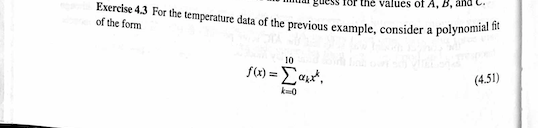

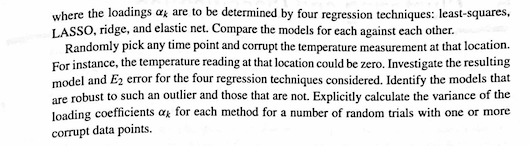

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.optimize import minimize
from matplotlib import rcParams
from sklearn import linear_model

In [2]:
# The data
x=np.arange(1,25)
y=np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])

Text(0.5, 1.0, 'The original temperature data')

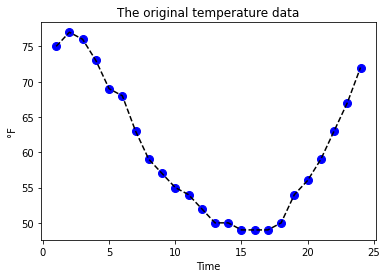

In [3]:
# Plot the original temperature data
plt.plot(x,y,'o',color='b',ms=8) # Data
plt.plot(x,y,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('The original temperature data')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1770.9071671931713, tolerance: 8.9266
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12153e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5310.864793143206, tolerance: 8.9266
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Elastic net')

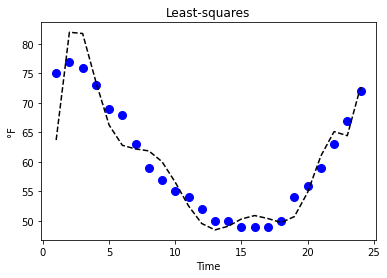

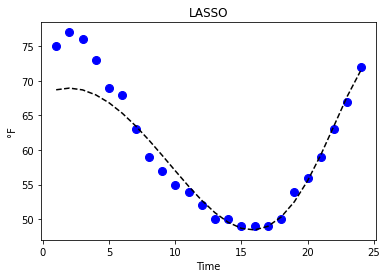

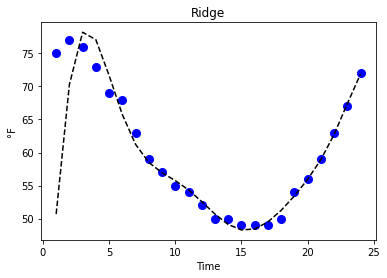

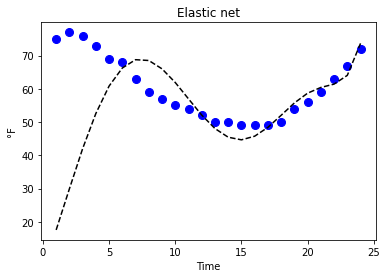

In [4]:
n = x.shape[0]
M = 11 # Polynomial degree

phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j) # Build matrix A
    
lam = 0.1

# Using least-squares regression technique
a1 = np.linalg.lstsq(phi,y,rcond=None)[0]
f1 = phi @ a1

plt.figure()
plt.plot(x,y,'o',color='b',ms=8) # Data
plt.plot(x,f1,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('Least-squares')


# Using LASSO regression technique
lasso = linear_model.Lasso(fit_intercept = False, alpha=1.0).fit(phi,y)
a2 = lasso.coef_
f2 = phi @ a2 

plt.figure()
plt.plot(x,y,'o',color='b',ms=8) # Data
plt.plot(x,f2,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('LASSO')

# Using ridge regression technique
ridge = linear_model.Ridge(fit_intercept = False,alpha=1.0).fit(phi,y)
a3 = ridge.coef_
f3 = phi @ a3 

plt.figure()
plt.plot(x,y,'o',color='b',ms=8) # Data
plt.plot(x,f3,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('Ridge')

# Using elastic net regression technique
regr = linear_model.ElasticNet(fit_intercept = False, alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
regr.fit(phi, y)  
a4 = regr.coef_
f4 = phi @ a4 

plt.figure()
plt.plot(x,y,'o',color='b',ms=8) # Data
plt.plot(x,f4,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('Elastic net')

### <span style='color:Purple'> Conclusion: The two regression methods LASSO and ridge perform better.</span>

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2893.2210853979172, tolerance: 8.6766
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12153e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6098.469985708489, tolerance: 8.6766
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Elastic net')

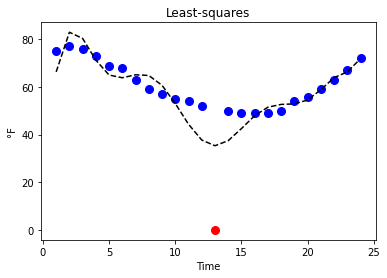

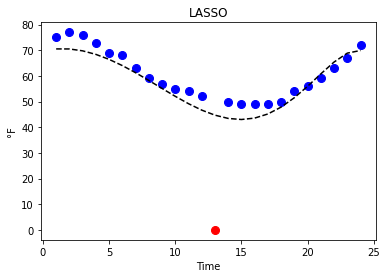

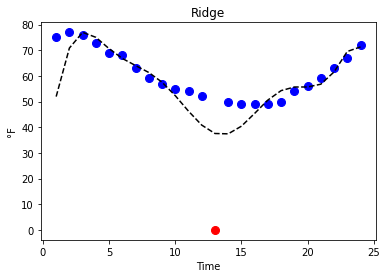

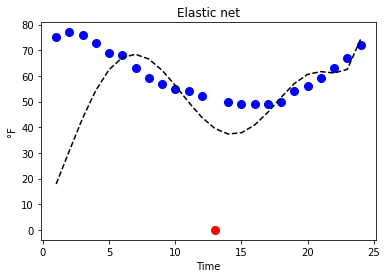

In [7]:
# Randomly pick any time points and corrupt the temperature measurement at that location
# Examine which technique is robust to such an outlier in these four regression techniques

index= np.floor(np.random.rand(1) * 24).astype(int)
y1 = np.copy(y)
y1[index]=0

x2=np.append(x[0:index[0]], x[(index[0]+1):25])
y2=np.append(y1[0:index[0]], y1[(index[0]+1):25])


# Using least-squares regression technique
a11 = np.linalg.lstsq(phi,y1,rcond=None)[0]
f11 = phi @ a11

plt.figure()
plt.plot(x2,y2,'o',color='b',ms=8) # Data
plt.plot(x[index[0]],y1[index[0]],'o',color='r',ms=8)   # Outlier
plt.plot(x,f11,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('Least-squares')


# Using LASSO regression technique
lasso = linear_model.Lasso(fit_intercept = False, alpha=1.0).fit(phi,y1)
a22 = lasso.coef_
f22 = phi @ a22

plt.figure()
plt.plot(x2,y2,'o',color='b',ms=8) # Data
plt.plot(x[index[0]],y1[index[0]],'o',color='r',ms=8)   # Outlier
plt.plot(x,f22,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('LASSO')

# Using ridge regression technique
ridge = linear_model.Ridge(fit_intercept = False, alpha=1.0).fit(phi,y1)
a33 = ridge.coef_
f33 = phi @ a33 

plt.figure()
plt.plot(x2,y2,'o',color='b',ms=8) # Data
plt.plot(x[index[0]],y1[index[0]],'o',color='r',ms=8)   # Outlier
plt.plot(x,f33,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('Ridge')

# Using elastic net regression technique
regr = linear_model.ElasticNet(fit_intercept = False, alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
regr.fit(phi, y1)  
a44 = regr.coef_
f44 = phi @ a44 

plt.figure()
plt.plot(x2,y2,'o',color='b',ms=8) # Data
plt.plot(x[index[0]],y1[index[0]],'o',color='r',ms=8)   # Outlier
plt.plot(x,f44,'--',color='k')
plt.ylabel('°F')
plt.xlabel('Time')
plt.title('Elastic net')

### <span style='color:Purple'> Conclusion: The LASSO regression methods is more robust. The least-squares, ridge and the elastic net regression methods are less robust.</span>

# <span style='background :yellow' > Exercise 4.4</span>

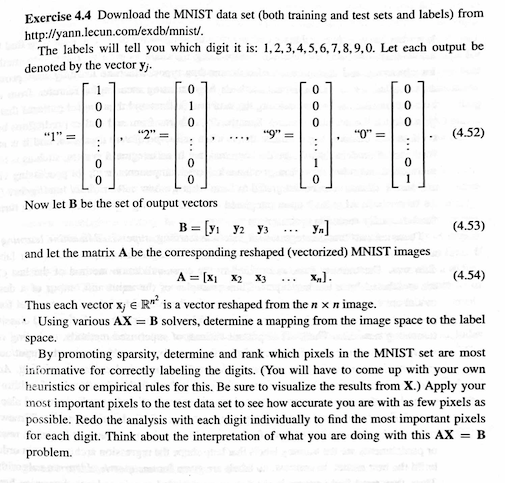

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


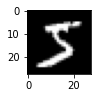

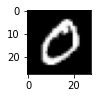

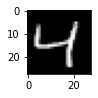

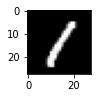

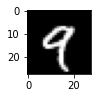

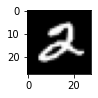

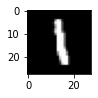

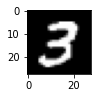

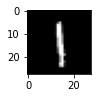

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.optimize import minimize
from matplotlib import rcParams
from sklearn import linear_model
from keras.datasets import mnist

#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
 
#plotting
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [2]:
T=train_X #[index,:]
t=T.shape
Ty=train_y #[index]
t[0]

60000

In [3]:
#Construct the matrix A
A=np.reshape(T,(t[0],28*28))
A.shape

(60000, 784)

In [4]:
# Construct the matrix B
B=np.zeros((t[0],10))
for i in range (0,t[0]):
    if Ty[i]>0:
       B[i,Ty[i]-1]=1
    else:
       B[i,9]=1
B.shape

(60000, 10)

In [5]:
# Use the LASSO regression method
from sklearn import linear_model
X=linear_model.Lasso(alpha=1.0).fit(A,B).coef_
X=X.T

In [6]:
# The test accuracy
num=10000
num_correct=0
Label=np.identity(10)
for j in range(num):   
    Te=test_X[j,:]
    A1=np.reshape(Te,(1,28*28))
    pred=A1 @ X
    #pred=np.abs(pred) 
    #label_pred=np.argmax(pred)
    Dist=[]
    for k in range(10):
        dist_relative=np.linalg.norm(pred-Label[k,:], ord = 1)#/np.linalg.norm(Label[k,:], ord = 1)
        Dist.append(dist_relative)
    if np.argmin(Dist) < 9:
        label_pred=np.argmin(Dist)+1
    else:
        label_pred=0
        
    label=test_y[j]
    
    if label_pred==label:
        num_correct=num_correct+1
test_acc = num_correct / num
test_acc       

0.7769

### <span style='color:Purple'> The test accuracy rate is 0.77.</span>

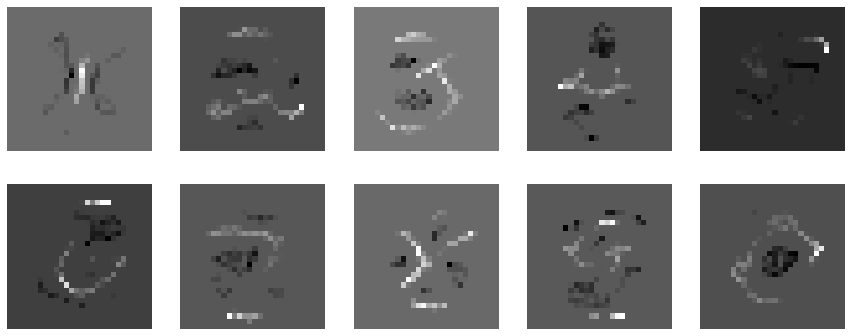

In [9]:
# Visualize the results from X
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(X[:,i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()